## DATA CLEANING AND EDA

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

In [2]:
df = pd.read_pickle("project2_data/SFproperty_df")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     1182 non-null   object
 1   Location    1182 non-null   object
 2   Price       1182 non-null   object
 3   Beds        1182 non-null   object
 4   Baths       1182 non-null   object
 5   Sq.Ft.      1182 non-null   object
 6   $/Sq.Ft.    1182 non-null   object
 7   On Redfin   1182 non-null   object
 8   HOA         1182 non-null   object
 9   Year Built  1182 non-null   object
 10  Lot Size    1182 non-null   object
 11  Date Sold   1182 non-null   object
 12  Zip Code    1182 non-null   object
 13  prop_type   1182 non-null   object
dtypes: object(14)
memory usage: 129.4+ KB


### Checking the dataset: <br> (1) Convert data to appropriate types <br> (2) Check out records that don't seem to make sense

In [4]:
# check for duplicates(2 of them) and drop the record with less info
df["Address"].duplicated().sum()
df[df["Address"].duplicated()]
print(df[df["Address"] == "2031 Hayes St"])
df.drop_duplicates(subset = ["Address"], inplace = True)
# df[df["Address"] == "2031 Hayes St"]

           Address              Location       Price Beds Baths Sq.Ft.  \
599  2031 Hayes St  San Francisco County  $1,800,000    3   2.5  1,670   
698  2031 Hayes St                        $1,800,000    3     3      —   

    $/Sq.Ft. On Redfin   HOA Year Built Lot Size     Date Sold  \
599   $1,078  163 days  None       1910        —  AUG 10, 2020   
698        —         —  None       1910        —  AUG 10, 2020   

                Zip Code prop_type  
599  2031-Hayes-St-94117     condo  
698  2031-Hayes-St-94117     condo  


In [5]:
# double checking after duplicate removal
df.groupby(["Address", "Zip Code"])["Address"].count().sort_values(ascending = False).head()

Address             Zip Code              
1 Burnett Ave N #3  1-Burnett-Ave-N-94131     1
4031 Cabrillo St    4031-Cabrillo-St-94121    1
42 August Aly       42-August-Aly-94133       1
418 Ellsworth St    418-Ellsworth-St-94110    1
416 Broderick St    416-Broderick-St-94117    1
Name: Address, dtype: int64

In [6]:
# convert Date Sold to datetime object
df["Date Sold"] = pd.to_datetime(df["Date Sold"])
df["Date Sold"].value_counts().sort_index()
df["Date Sold"].value_counts()

2020-08-21    17
2020-12-01    15
2020-11-13    14
2020-12-11    14
2020-10-23    14
              ..
2020-04-10     1
2020-04-21     1
2020-03-18     1
2020-05-13     1
2020-03-10     1
Name: Date Sold, Length: 238, dtype: int64

In [7]:
# removing symbols in house Price
df["Price"] = ["".join(p.strip("$").split(",")) for p in df["Price"]]

#convert Price to numbers and check for missing values
df["Price"] = pd.to_numeric(df["Price"])

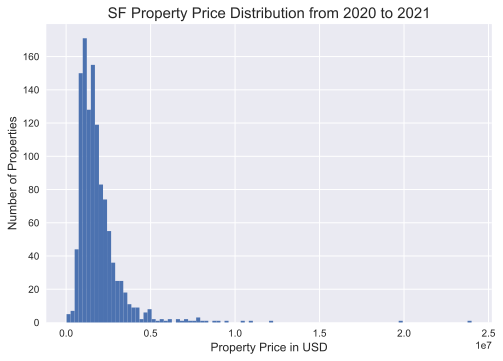

In [9]:
#look at property price distribution
#plt.rcParams["figure.figsize"] = [5,3]
#plt.rcParams["figure.dpi"] = 200

plt.hist(df["Price"], bins = 100)
plt.title("SF Property Price Distribution from 2020 to 2021", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Property Price in USD", fontsize = 12);
#plt.savefig("project2_images/histogram_property_price.png");

In [ ]:
# sns.set_style("darkgrid")
# price_hist = sns.histplot(df["Price"], bins=100, kde=True)
# price_hist.set(xlabel="Number of Property", ylabel="Property Price in USD")
# plt.title("SF Property Price Distribution from 2020 to 2021", fontsize=15);

In [14]:
# check outliers, how should outliers be defined? 
# houses cost > 5mil don't seem to be particularly out of the ordinary since they are huge in size
print(df["Price"].describe())
print(len(df[df["Price"] > 5000000]))
print(len(df[df["Price"] < 500000])) 

df[df["Price"] > 5000000].sort_values("Price", ascending = False)

count    1.168000e+03
mean     1.897816e+06
std      1.486412e+06
min      2.700000e+04
25%      1.119250e+06
50%      1.600000e+06
75%      2.210000e+06
max      2.400000e+07
Name: Price, dtype: float64
28
11


,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
147,190 Sea Cliff Ave,Sea Cliff,24000000.0,4,6.5,"10,725","$2,238",69 days,None,1913,0.25 Acres,2020-11-12,190-Sea-Cliff-Ave-94121,house
81,2775 Vallejo St,Pacific Heights,19750000.0,6,6.5,—,—,21 days,None,1916,"6,806 Sq. Ft.",2020-12-30,2775-Vallejo-St-94123,house
939,2171 Pacific Ave,Pacific Heights,12230000.0,31,—,"20,818",$587,84 days,None,1965,"8,934 Sq. Ft.",2020-10-28,2171-Pacific-Ave-94115,multi_fam
1051,2101 California St,Pacific Heights,11000000.0,21,—,"16,076",$684,233 days,None,1923,"5,911 Sq. Ft.",2020-06-01,2101-California-St-94115,multi_fam
1104,3959 Washington St,,10500000.0,5,4,—,—,—,None,1913,"3,632 Sq. Ft.",2020-10-30,3959-Washington-St-94118,multi_fam
321,2561 Washington St,,9600000.0,5,3,—,—,—,None,1900,"5,105 Sq. Ft.",2020-03-11,2561-Washington-St-94115,house
1175,1647 Sanchez St,,9100000.0,4,2,—,—,—,None,1900,"2,592 Sq. Ft.",2020-07-24,1647-Sanchez-St-94131,multi_fam
343,2840 Green St,,8800000.0,5,4,—,—,—,None,1936,"3,438 Sq. Ft.",2020-12-08,2840-Green-St-94123,house
123,31 Presidio Ter,Presidio Heights,8300000.0,7,7.5,"9,245",$898,56 days,$700/month,1909,"7,919 Sq. Ft.",2020-11-25,31-Presidio-Ter-94118,house
1093,2150-2160 Fell St,North Panhandle,7950000.0,10,—,"9,825",$809,357 days,None,1926,"5,153 Sq. Ft.",2020-01-29,2150-Fell-St-94117,multi_fam


In [13]:
df[df["Price"] < 500000].sort_values("Price")

,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
1140,2061 10th Ave,,27000.0,2,1,"1,178",$23,—,None,1947,"3,000 Sq. Ft.",2020-07-01,2061-10th-Ave-94116,multi_fam
638,1335 Filbert St #101,Russian Hill,187620.0,1,1,914,$205,209 days,$552/month,1924,—,2020-06-25,1335-Filbert-St-94109,condo
444,901 Bayshore Blvd #308,Silver Terrace,196842.0,1,1,530,$371,21 days,$382/month,2003,—,2020-12-30,901-Bayshore-Blvd-94124,condo
1132,101 Caselli Ave #103,,201500.0,4,5,—,—,—,None,1927,"2,596 Sq. Ft.",2020-10-08,101-Caselli-Ave-94114,multi_fam
1099,1157 Broadway,,214000.0,7,8,—,—,—,None,1923,—,2020-10-26,1157-Broadway-94109,multi_fam
305,33 Aladdin Ter,,305000.0,—,2,—,—,—,None,1907,"1,406 Sq. Ft.",2020-09-29,33-Aladdin-Ter-94133,house
489,55 Page St #315,SAN FRANCISCO,371490.0,1,1,750,$495,57 days,$542/month,2008,—,2020-11-24,55-Page-St-94102,condo
471,1346 Stevenson St Unit B201,South of Market,400000.0,1,1,600,$667,41 days,$449/month,1997,—,2020-12-10,1346-Stevenson-St-94103,condo
664,4569 Mission St #8,,400000.0,—,—,"1,541",$260,—,None,1979,—,2020-05-08,4569-Mission-St-94112,condo
584,83 McAllister #205Listing Agent: David Azimi,San Francisco,470000.0,0,1,254,"$1,850",152 days,$458/month,2007,—,2020-08-21,83-McAllister-St-94102,condo


#### NOTES: Try removing properties > 10mil and <200k in later analysis

In [15]:
# drop a record with Price misrecorded
df.drop(df[df["Price"] == 27000].index, inplace = True)

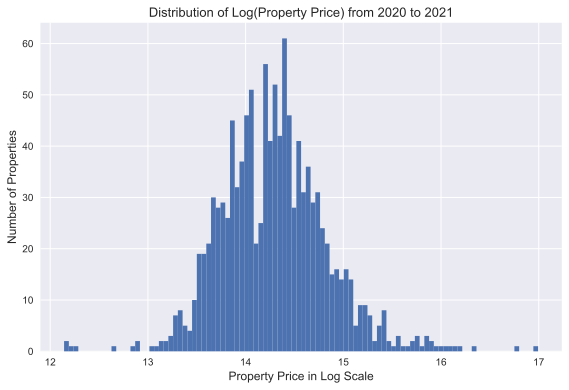

In [16]:
# Price distribution is right skewed, apply log transform
log_Price = np.log(df["Price"])

plt.hist(log_Price, bins = 100)
plt.title("Distribution of Log(Property Price) from 2020 to 2021", fontsize = 13)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Property Price in Log Scale", fontsize = 12)
plt.tight_layout();
#plt.savefig("project2_images/histogram_LOG_property_price.png");

In [17]:
# check missing values in Location
print(len(df[df["Location"] == "—"]))
print(len(df[df["Location"] == ""])) #191 missing values for location, but guess Zip Code can approximate location!?

0
191


In [18]:
# check missing values in Beds and Baths
print(len(df[df["Beds"] == "—"])) #124 obs missing values in Beds
print(len(df[df["Baths"] == "—"])) #118 obs missing values in Baths

mask = (df["Beds"] == "—") & (df["Baths"] == "—")
print(len(df[mask])) #42 obs missing both Beds and Baths

# replace "—" in both Beds and Baths with none
df["Beds"].replace({"—":None}, inplace = True)
df["Baths"].replace({"—":None}, inplace = True)

124
118
42


In [19]:
# convert Beds to integer and Baths to float
# int vs float makes a difference in interpretation
df["Beds"] = pd.to_numeric(df["Beds"]).astype("Int64")
df["Baths"] = pd.to_numeric(df["Baths"])

In [22]:
df[["Beds","Baths"]].describe()
df["Beds"].value_counts().sort_index()

0      12
1     107
2     301
3     259
4     166
5      70
6      50
7      26
8      15
9      10
10      8
11      2
12     13
14      1
16      3
18      3
20      1
21      3
22      1
24      3
28      1
31      1
Name: Beds, dtype: Int64

In [21]:
df[df["Beds"] == 0]
df["Baths"].value_counts().sort_index() #there can be 0.25 and 0.75 baths...o.O

1.00     235
1.25       5
1.50      50
1.75       3
2.00     341
2.25       3
2.50      83
2.75       1
3.00     124
3.50      55
4.00      76
4.50      15
5.00      26
5.50       6
6.00      15
6.50       3
7.00       4
7.50       1
8.00       7
9.00       1
10.00      2
12.00      3
16.00      1
19.00      1
24.00      1
Name: Baths, dtype: int64

#### Make sense to have 0 bed, in case of studio units, but always have >= 1 bath

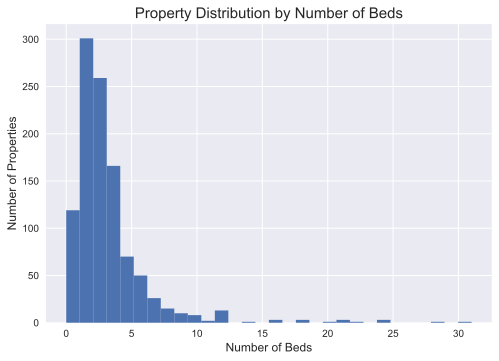

In [23]:
# look at distribution of property by number of bedrooms
Beds_noNA = df[df["Beds"].notnull()]["Beds"]

plt.hist(Beds_noNA, bins = 30)
plt.title("Property Distribution by Number of Beds", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Number of Beds", fontsize = 12);

In [24]:
# check missing values in house size(Sq.Ft.)
print(len(df[df["Sq.Ft."] == "—"])) #269 obs missing values in size

# removing symbols in house size(Sq.Ft.) and replacing "—" with null
df["Sq.Ft."] = ["".join(s.split(",")) for s in df["Sq.Ft."]]
df["Sq.Ft."].replace({"—":None}, inplace = True)

269


In [25]:
# convert size to numeric
df["Sq.Ft."] = pd.to_numeric(df["Sq.Ft."])
# df["Sq.Ft."].isna().sum()

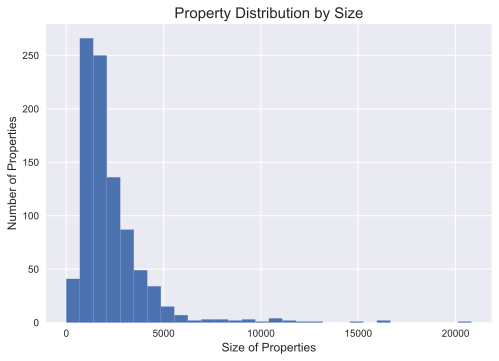

In [26]:
# look at distribution of property by size
plt.hist(df["Sq.Ft."], bins = 30)
plt.title("Property Distribution by Size", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Size of Properties", fontsize = 12);

In [34]:
# check outliers in property size
df["Sq.Ft."].describe()
df[df["Sq.Ft."] == 0] #2 listings have size 0, redfin records reported by owners

,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
5,9 Rosemary Ct,Parkside,2035000.0,0,NaN,0.0,—,21 days,None,1962,—,2020-12-30,9-Rosemary-Ct-94116,house
146,34 West Clay St,Lake,7000000.0,0,NaN,0.0,—,69 days,None,1912,—,2020-11-12,34-W-Clay-St-94121,house


In [36]:
# remove two records with 0 size
mask = (df["Sq.Ft."] == 0)
df.drop(df[mask].index, inplace = True)

In [37]:
df[df["Sq.Ft."] > 10000]

,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
147,190 Sea Cliff Ave,Sea Cliff,24000000.0,4,6.5,10725.0,"$2,238",69 days,None,1913,0.25 Acres,2020-11-12,190-Sea-Cliff-Ave-94121,house
878,2028 Scott St,Pacific Heights,6250000.0,21,NaN,11493.0,$544,14 days,None,1966,"5,292 Sq. Ft.",2021-01-06,2028-Scott-St-94115,multi_fam
905,1623-1633 California St,Nob Hill,6500000.0,10,NaN,15052.0,$432,40 days,None,1923,"6,873 Sq. Ft.",2020-12-11,1623-California-St-94109,multi_fam
926,3014 Clay St,Pacific Heights,7920000.0,24,NaN,12375.0,$640,72 days,None,1963,"6,381 Sq. Ft.",2020-11-09,3014-Clay-St-94115,multi_fam
929,25-35 Hoff St,Inner Mission,4125000.0,24,NaN,16470.0,$250,75 days,None,1907,"7,361 Sq. Ft.",2020-11-06,25-Hoff-St-94110,multi_fam
935,1450 Golden Gate Ave,Western Addition,4560000.0,6,NaN,10515.0,$434,79 days,None,1928,"4,809 Sq. Ft.",2020-11-02,1450-Golden-Gate-Ave-94115,multi_fam
939,2171 Pacific Ave,Pacific Heights,12230000.0,31,NaN,20818.0,$587,84 days,None,1965,"8,934 Sq. Ft.",2020-10-28,2171-Pacific-Ave-94115,multi_fam
973,734-740 Green St,North Beach,6725000.0,21,NaN,10670.0,$630,110 days,None,1907,"4,639 Sq. Ft.",2020-10-02,734-Green-St-94133,multi_fam
1008,743 Monterey Blvd,Sunnyside,3300000.0,16,NaN,10852.0,$304,148 days,None,1988,"5,625 Sq. Ft.",2020-08-25,743-Monterey-Blvd-94127,multi_fam
1051,2101 California St,Pacific Heights,11000000.0,21,NaN,16076.0,$684,233 days,None,1923,"5,911 Sq. Ft.",2020-06-01,2101-California-St-94115,multi_fam


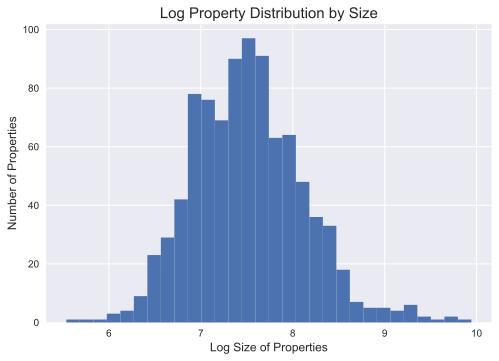

In [38]:
# size has right skewed distribution, log transform
plt.hist(np.log(df["Sq.Ft."]), bins = 30)
plt.title("Log Property Distribution by Size", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Log Size of Properties", fontsize = 12);

In [40]:
# check missing values in HOA
print(len(df[df["HOA"] == ""])) #13 missing value in HOA
df["HOA"].value_counts() 

# turn HOA into numeric
df["HOA"] = ["".join(h.split("/")[0].strip("$").split(",")) for h in df["HOA"]]
df["HOA"].replace({"None":"0"}, inplace = True)
df["HOA"] = pd.to_numeric(df["HOA"])
#df["HOA"].value_counts()

13


0.0      758
300.0     14
350.0     13
400.0     12
250.0      9
        ... 
292.0      1
538.0      1
717.0      1
750.0      1
485.0      1
Name: HOA, Length: 295, dtype: int64

In [41]:
# check missing values in Year Built
print(len(df[df["Year Built"] == "—"])) #48 missing values in Year Built
df["Year Built"].replace({"—":None}, inplace = True)

# convert Year Built to integers
df["Year Built"] = pd.to_numeric(df["Year Built"]).astype("Int64")
df["Year Built"].value_counts().sort_index(ascending = False)
df["Year Built"].isna().sum()

48


48

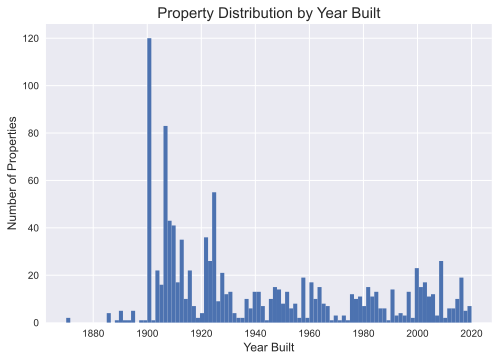

In [42]:
# look at distribution of Year Built
YB_noNA = df[df["Year Built"].notnull()]["Year Built"]
plt.hist(YB_noNA, bins = 100)
plt.title("Property Distribution by Year Built", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Year Built", fontsize = 12);

In [43]:
# check missing values in Lot Size and Date Sold
print(len(df[df["Lot Size"] == "—"])) #503 missing values in LotSize, make sense to be missing for condo

print(len(df[df["Date Sold"] == "—"]))
print(len(df[df["Date Sold"] == ""])) #0 missing values in Date Sold, should divide in month and year

503
0
0


In [44]:
# extract the year and month from Date Sold
df["year_sold"] = pd.DatetimeIndex(df["Date Sold"]).year
df["month_sold"] = pd.DatetimeIndex(df["Date Sold"]).month

In [45]:
# check missing values in Zip Code
print(len(df[df["Zip Code"] == "—"]))
print(len(df[df["Zip Code"] == ""])) #0 missing values in Zip Code, need to extract Zip Code from of the string

#extrac zip code from the string
df["Zip Code"] = [zip.split("-")[-1] for zip in df["Zip Code"]]
df["Zip Code"].value_counts()

0
0


94110    130
94109    116
94114    101
94117     87
94121     84
94122     75
94112     73
94118     72
94131     69
94115     61
94107     55
94123     41
94133     40
94103     36
94124     31
94102     30
94134     20
94132     19
94116     11
94127     10
94108      5
94105      5
94158      4
94111      2
94014      1
Name: Zip Code, dtype: int64

In [46]:
# one zip code (one listing) maps to Daly City, delete record
df.drop(df[df["Zip Code"] == "94014"].index, inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1181
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Address     1177 non-null   object        
 1   Location    1177 non-null   object        
 2   Price       1164 non-null   float64       
 3   Beds        1053 non-null   Int64         
 4   Baths       1061 non-null   float64       
 5   Sq.Ft.      908 non-null    float64       
 6   $/Sq.Ft.    1177 non-null   object        
 7   On Redfin   1177 non-null   object        
 8   HOA         1164 non-null   float64       
 9   Year Built  1129 non-null   Int64         
 10  Lot Size    1177 non-null   object        
 11  Date Sold   1177 non-null   datetime64[ns]
 12  Zip Code    1177 non-null   object        
 13  prop_type   1177 non-null   object        
 14  year_sold   1177 non-null   int64         
 15  month_sold  1177 non-null   int64         
dtypes: Int64(2), datetime64[

In [48]:
df.to_pickle("/Users/sarazzzz/Desktop/Metis/CAMP/Metis_project2/prop_cleaned_r1")

### LOOKING into missing values in size

In [ ]:
df[df["Sq.Ft."].isna()].sort_values("Price", ascending = True).head()

In [ ]:
df[df["Sq.Ft."].isna()].sort_values("Price", ascending = True).tail()

In [ ]:
#can I fill in missing size with Price/($/Sq.Ft.)??
#$/Sq.Ft. has more missing values than size, cannot be use to fill in missing values in size
mask = (df["Sq.Ft."].isna()) & (df["$/Sq.Ft."] == "—")
len(df[mask])

### ^ CONCLUSION: missing values can be filled in from individual property page <br> Dropping observation with missing values (back to scraping if more time)

In [ ]:
#check other missing values
df.info()

### NOW GOING BACK TO MISSING VALUES in Beds and Baths after removing missing values in size

In [ ]:
#check missing values in Beds
print(df["Beds"].isna().sum())
df[df["Beds"].isna()].sort_values("prop_type").head()#still have 31 missing, 30 multi-family units...T.T
df[df["Beds"].isna()].sort_values("prop_type").tail()

In [ ]:
len(df[df["prop_type"] == "multi_fam"])

In [ ]:
#check missing values in Baths
print(df["Baths"].isna().sum())
df[df["Baths"].isna()].sort_values("prop_type").head(10)#still have 99 missing values, 92 multi-family units
df[df["Baths"].isna()].sort_values("prop_type").tail()

### ^ CONCLUSION: some values can be filled from indivial page, and both Beds and Baths are missing @ random (mostly missing in multi-family units) -> Safe to drop NAs

In [ ]:
#drop observations with missing values in Beds and Baths
df.dropna(subset = ["Beds", "Baths"], axis = 0, inplace = True)
df.info()

### LOOK at missing values in Year Built

In [ ]:
df[df["Year Built"].isna()].sort_values("Price").head(8)

In [ ]:
df[df["Year Built"].isna()].sort_values("Price").tail()

In [ ]:
# should do this later after converting other features to the appropriate data type

plt.rcParams["figure.figsize"] = [6, 4]
mn.matrix(df[["Price", "Beds", "Baths"]])

In [ ]:
# drop records with missing values in Price and a record with Price misrecorded
print(df["Price"].isna().sum()) #13 obs missing Price
df[df["Price"].isna()]
df[df["Price"].isna()].groupby(["prop_type"])["prop_type"].count()

df.dropna(subset = ["Price"], axis = 0, inplace = True)
df.info()

### ^ CONCLUSION: Looks like missing at completely random, info. can be found in individual page <br> Impute with random sampling from the range of Year Built

In [ ]:
#number of NAs in Year Built
mask = df["Year Built"].isna()
YB_NAs = mask.sum()

#fill in NAs with random sampling
fill = np.random.choice(df[df["Year Built"].notnull()]["Year Built"].values, size = YB_NAs)
df.loc[mask, "Year Built"] = fill

In [ ]:
df.info()

In [ ]:
# double check distribution of Year Built
plt.hist(df["Year Built"], bins = 100)
plt.title("Property Distribution by Year Built", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Year Built", fontsize = 12);

In [ ]:
# #Does property price goes up or down the past year?
# plt.rcParams["figure.figsize"] = [6,6]
# plt.rcParams["figure.dpi"] = 200

# price_month = df.groupby(["year_sold", "month_sold"])["Price"].median()
# num_prop = df.groupby(["year_sold", "month_sold"])["Price"].count()

# plt.subplot(2,1,1)

# plt.plot(range(len(price_month)), price_month, linewidth = 3)
# plt.title("Median Property Price in the Past Year", fontsize = 15, weight = "bold")
# plt.ylabel("Median Property Price", fontsize = 12, weight = "bold")
# ytick_lab = ["1.5million", "1.6million", "1.7million", "1.8million", "1.9million"]
# plt.yticks(ticks = list(range(1500000, 2000000, 100000)), labels = ytick_lab)

# plt.subplot(2,1,2)
# #change color of every other bar
# barlist = plt.bar(range(len(num_prop)), num_prop)
# for bar in range(0, len(barlist), 2):
#     barlist[bar].set_color("lightblue")
# plt.title("Number of Property Sold in the Past Year", fontsize = 15, weight = "bold")
# plt.ylabel("Number of Property", fontsize = 12, weight = "bold")
# plt.xlabel("Jan 2020 to Jan 2021", fontsize = 12, weight = "bold")
# xtick_lab = ["Jan 20", "Feb 20", "Mar 20", "Apr 20", "May 20", "Jun 20", 
#              "Jul 20", "Aug 20", "Sep 20", "Oct 20", "Nov 20", "Dec 20", "Jan 21"]
# plt.xticks(range(len(price_month)), xtick_lab, rotation = 45)
# plt.tight_layout();
# plt.savefig("project2_images/median_price_past_year.png");

In [ ]:
#Does property price goes up or down the past year?
price_month = df.groupby(["year_sold", "month_sold"])["Price"].median()
num_prop = df.groupby(["year_sold", "month_sold"])["Price"].count()

plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["figure.dpi"] = 200
fig, axes = plt.subplots(2, 1, sharex=True)

ax = axes[0]

ax.plot(range(len(price_month)), price_month, linewidth = 3)
ax.set_title("Median Property Price in the Past Year", fontsize = 15, weight = "bold")
ax.set_ylabel("Median Property Price", fontsize = 12, weight = "bold")
ax.set_yticks(ticks = list(range(1500000, 2000000, 100000)))
ax.set_yticklabels(["1.4million", "1.5million", "1.6million", "1.7million", "1.8million"])


ax2 = axes[1]
#change color of every other bar
barlist = ax2.bar(range(len(num_prop)), num_prop)
for bar in range(0, len(barlist), 2):
    barlist[bar].set_color("lightblue")
ax2.set_title("Number of Property Sold in the Past Year", fontsize = 15, weight = "bold")
ax2.set_ylabel("Number of Property", fontsize = 12, weight = "bold")

plt.xlabel("Jan 2020 to Jan 2021", fontsize = 12, weight = "bold")
xtick_lab = ["Jan 20", "Feb 20", "Mar 20", "Apr 20", "May 20", "Jun 20", 
             "Jul 20", "Aug 20", "Sep 20", "Oct 20", "Nov 20", "Dec 20", "Jan 21"]
plt.xticks(range(len(price_month)), xtick_lab, rotation = 45)

plt.tight_layout();
plt.savefig("project2_images/median_price_past_year.png");

In [ ]:
df.info()

In [ ]:
df.to_pickle("/Users/sarazzzz/Desktop/Metis/CAMP/Metis_project2/prop_df_cleaned")